In [ ]:
# importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [90]:
# reading the data

df=pd.read_csv('/home/mylaptop/Documents/PYTHON/trial1/archive/healthcare-dataset-stroke-data.csv')
df



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [92]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


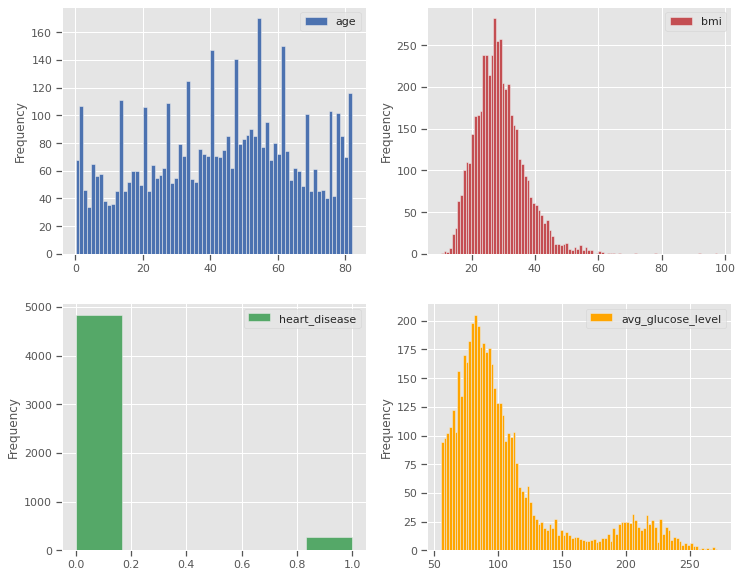

In [49]:
# variance feature distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()


In [93]:
# Data summary (Checking for mising values)
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


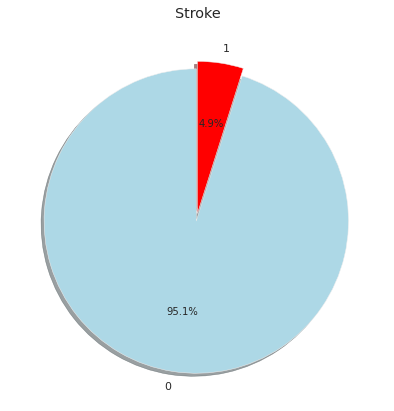

In [94]:
# Data visuaLization
# stroke pie chart

labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Stroke')
plt.show()



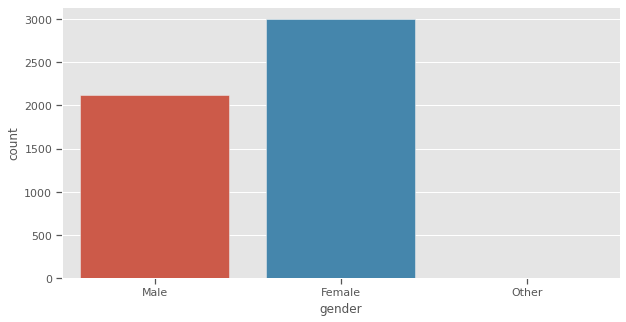

In [95]:
#Gender
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

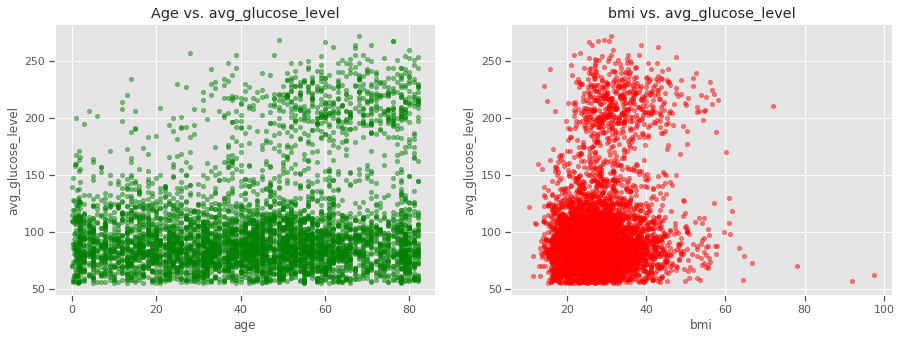

In [96]:
# correlation with average glucose level
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

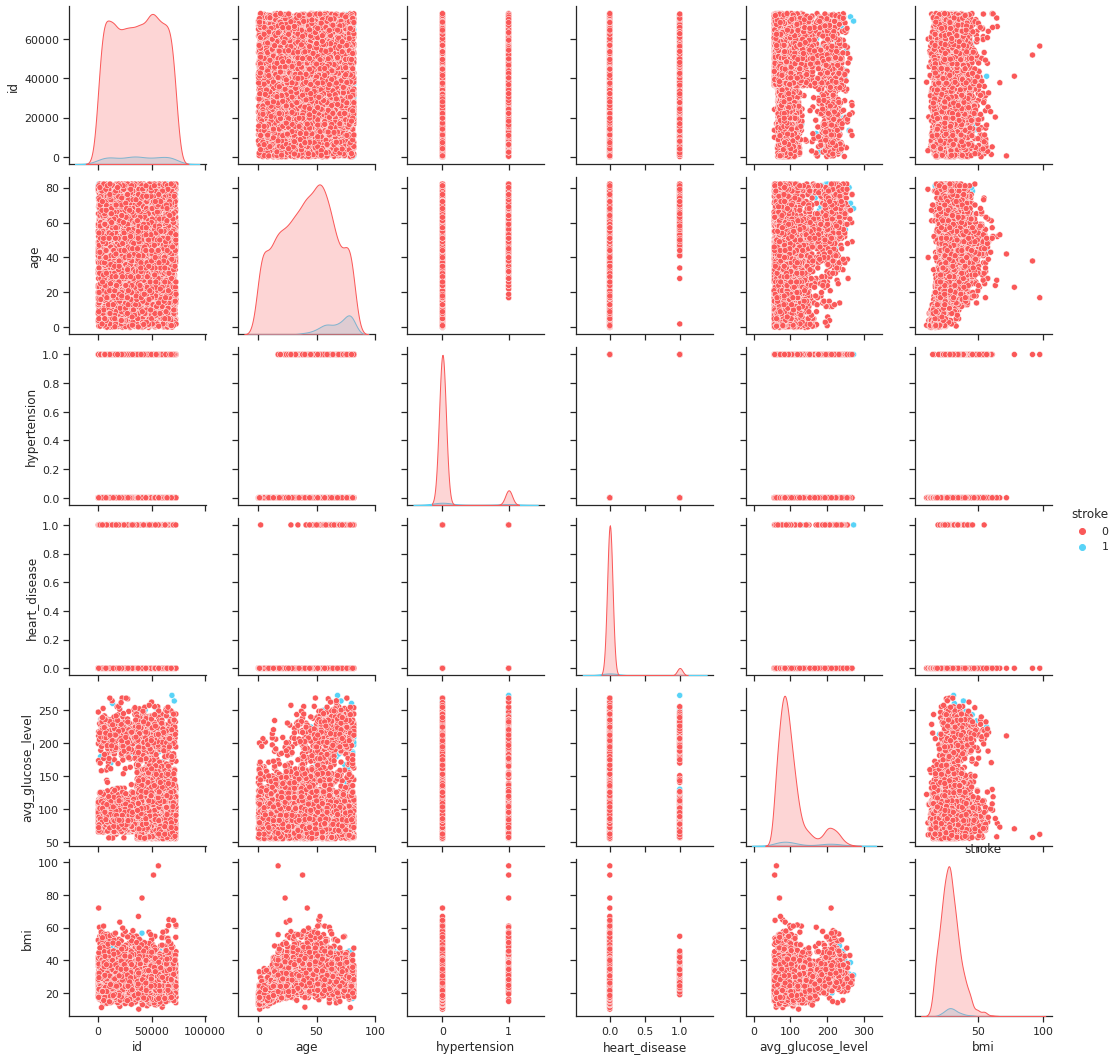

In [97]:
# Stoke or not pair Grid
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");


/tmp/ipykernel_3964/302072817.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


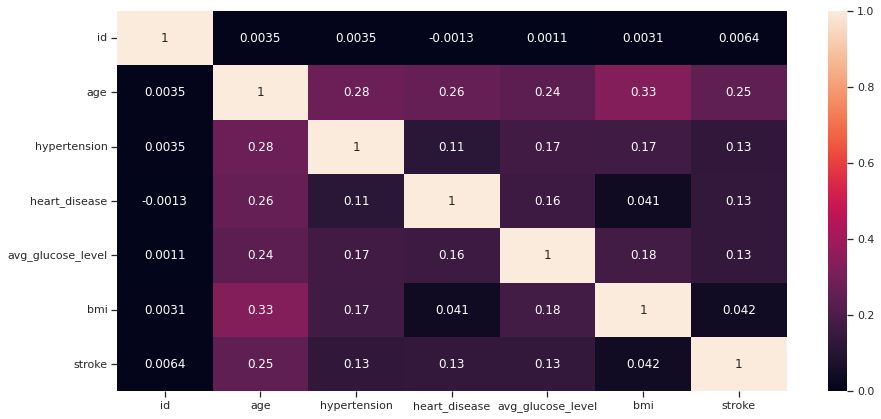

In [98]:
# Heatmap correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

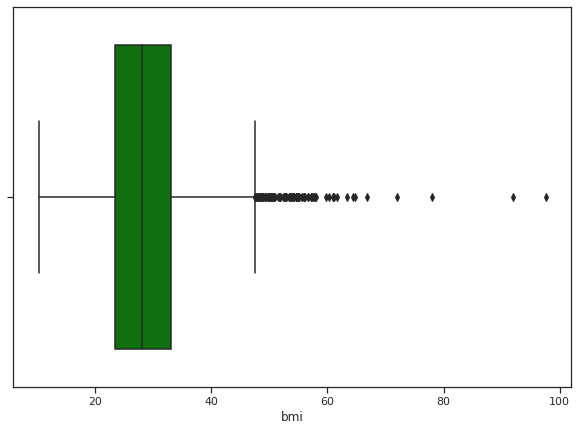

In [99]:
# BMI Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

In [100]:


bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape



(79,)

In [101]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


In [102]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)


In [103]:
# Double check for missing values
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [104]:
# stroke or not in categorical features
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

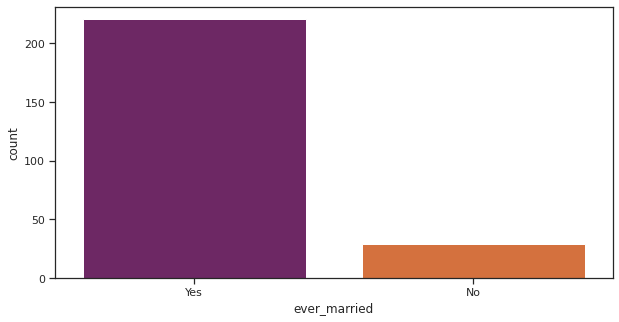

In [105]:

# stroke/Ever married
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');



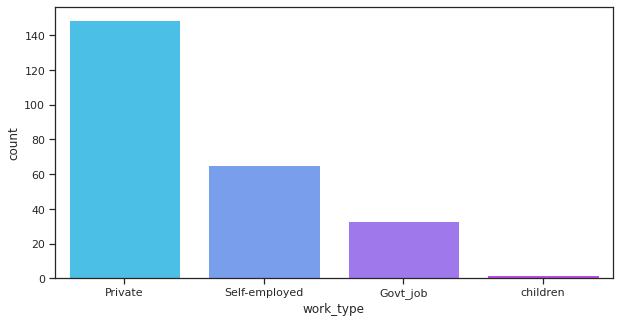

In [106]:
# stroke / work type
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

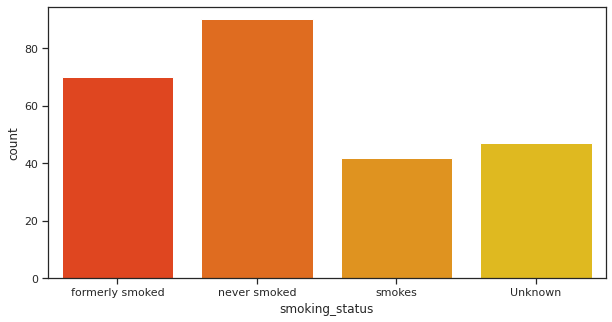

In [107]:
# stroke/smoking status
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

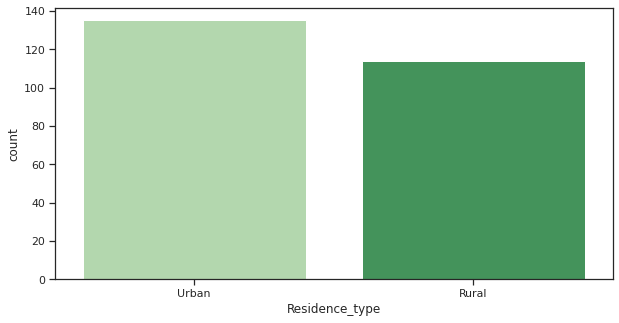

In [108]:
# Residence Type

plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');



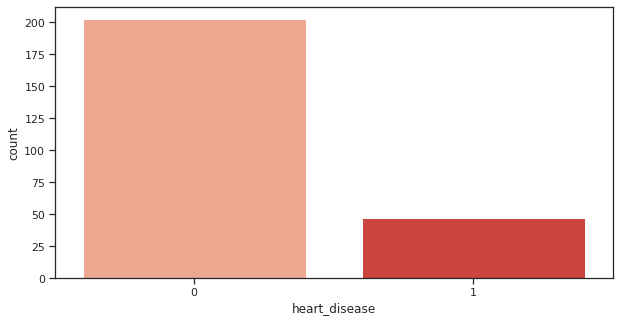

In [109]:
# Stroke/heart disease
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

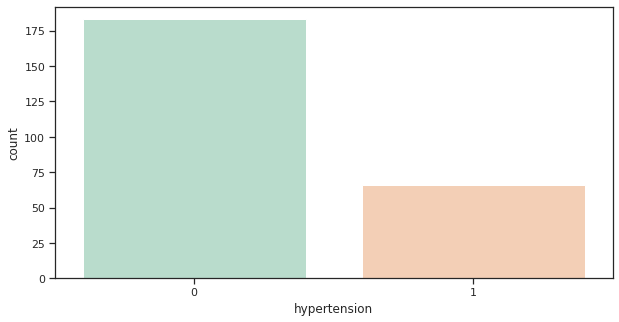

In [110]:
# stroke / hypertension
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

In [111]:
#DATA PREPROCESSING
# ENCODING CARTEGORICAL FEATURES

df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [112]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.4,1,0,0,1,0,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.4,0,0,0,1,0,0,0,1,0,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,0,1,0,0


In [113]:
# SCALING THE VARIANCE IN FEATURES
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)


In [114]:


df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df



,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.069344,1.051434
1,51676,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,-0.051399,0.786070
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,0.508972,1.626390
3,60182,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,0.768657,0.255342
4,1665,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-0.652774,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,-0.051399,1.626390
5106,44873,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.534042,1.670617
5107,19723,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,0.249288,-0.363842
5108,37544,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-0.434092,0.343796


In [115]:
# DROP ID FEATURE AND CHECK FOR NULLS
df=df.drop(columns='id',axis=1)

In [116]:

df[df.isnull().any(axis=1)]



,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age


In [117]:
# CLASSIFICATION MODELS
# TARGET & FEATURES

X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [118]:
#SPLITTING

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [119]:
# ADABOOST CLASSIFICATION
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)
print("training....\n")

#make prediction using the test set
ab_pred_stroke= ab_clf.predict(X_train)
print('prediction: \n', ab_pred_stroke)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))

training....

prediction: 
 [0 0 0 ... 0 0 1]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

mean accuracy: 0.91


/home/mylaptop/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Score 0.9639362594352809
Testing Score 
 0.9360730593607306
0.9360730593607306


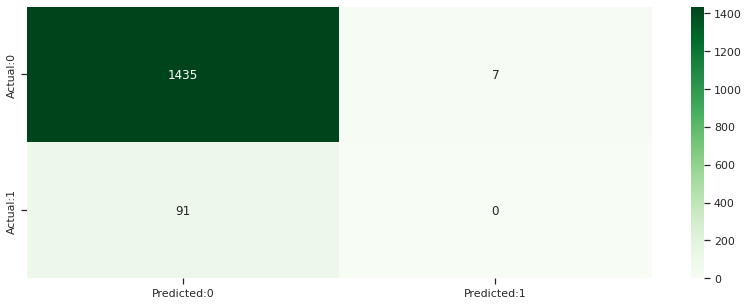

In [120]:
# XGBoost
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#== 
#Score 
#== 
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = xgboost.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)

#=== 
#Confusion Matrix 
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

In [121]:
#SVM
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)



Training Score 0.9558289069052278
Testing Score 
 0.9406392694063926
[[1442    0]
 [  91    0]]


In [122]:
# RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 1.0
Testing Score 
 0.9380300065231572
[[1438    4]
 [  91    0]]


In [123]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.9406392694063926
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1442
           1       0.00      0.00      0.00        91

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.88      0.94      0.91      1533

[[1442    0]
 [  91    0]]


/home/mylaptop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mylaptop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mylaptop/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
# FEATURE IMPORTANCE USING LOGISTIC REGRESSION
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)


[0.019046028763543943, 0.46473137777747625, 0.19080125415835206, 0.2914676889528991, 0.09277115920527998, 0.0739291890531072, 0.09469574322046444, 0.23674895909899257, 0.21611957111261285, 0.2135910807683652, 0.0338732913814142, 0.2445130198623217, 0.0229637309272395, 0.4011299121410671, 0.146279808597604, 0.06511234332646403, 1.5827282480830633]


In [125]:
cols = list(df.columns)
cols.index('stroke')
#== 
#Delete target label 
#== 
del cols[5]
cols


['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'avg_glucose_level',
 'bmi',
 'age']

In [126]:
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])


age
hypertension
work_type_children
ever_married
work_type_Private
smoking_status_never smoked
smoking_status_smokes
work_type_Govt_job
heart_disease
avg_glucose_level
smoking_status_formerly smoked
Residence_type
smoking_status_Unknown
bmi
work_type_Never_worked
work_type_Self-employed
gender


In [127]:
#MLP NN CLASSIFIER
X = df.drop(['stroke','gender','bmi','Residence_type','work_type_Never_worked','smoking_status_Unknown'], axis=1).values 
#X = df.drop(['stroke','bmi'], axis=1).values 
y = df['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [128]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 0.26399841
Iteration 2, loss = 0.15445966
Iteration 3, loss = 0.14945187
Iteration 4, loss = 0.14566917
Iteration 5, loss = 0.14425543
Iteration 6, loss = 0.14291985
Iteration 7, loss = 0.14266317
Iteration 8, loss = 0.14167495
Iteration 9, loss = 0.14062677
Iteration 10, loss = 0.14118603
Iteration 11, loss = 0.14290518
Iteration 12, loss = 0.14184532
Iteration 13, loss = 0.13720444
Iteration 14, loss = 0.14083110
Iteration 15, loss = 0.13643613
Iteration 16, loss = 0.13486106
Iteration 17, loss = 0.13450801
Iteration 18, loss = 0.13474663
Iteration 19, loss = 0.13166453
Iteration 20, loss = 0.13021960
Iteration 21, loss = 0.12946902
Iteration 22, loss = 0.12793827
Iteration 23, loss = 0.13024069
Iteration 24, loss = 0.12690370
Iteration 25, loss = 0.12705003
Iteration 26, loss = 0.12730738
Iteration 27, loss = 0.12534942
Iteration 28, loss = 0.12343673
Iteration 29, loss = 0.12421158
Iteration 30, loss = 0.12024454
Iteration 31, loss = 0.11923984
Iteration 32, los

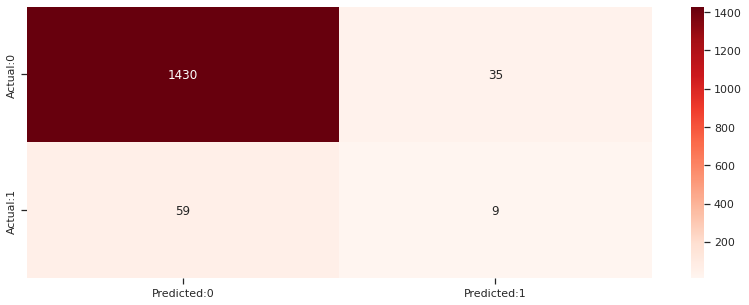

In [ ]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9386823222439661 
 The Missclassification = 1-Accuracy =                   0.06131767775603392 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.1323529411764706 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9761092150170648 

